Multiple regression 

Scale

Traint/Test



Day 1 7.14.22

In order:

How to install libraries 
How to import libraries
How to read in datas
How to create models
How to train models
How to predict new data
How to create your own data
How to plot data
How to determine how accurate your model is





In [21]:
# Install other useful files

# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install pydotplus
# !conda install --yes python-graphviz
# # !pip install graphviz     # part of using notebooks is figuring out how to integrate code into it. 
#                             # at first this code wasnt working and i had to look for this.
#                             # because the code was correct but the graph wasnt printing out 
#                             # then the answer https://stackoverflow.com/questions/39826250/conda-stuck-on-proceed-y-n-when-updating-packages-in-ipython-console
#                             # wouldnt work because it kept asking yes vs no and i had to adjust it to include the yes from the link above


# # if you're not familiar with any library like pandas there are tons of tutorials
# # read_csv
# # 



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

# import graphviz
# import pydotplus

from sklearn import linear_model
from sklearn import tree
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit


scale = StandardScaler()
# from sklearn.model_selection import train_test_split
print("no import problems")

no import problems


In [23]:
df = pd.read_csv("cars.csv")

print(df)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [24]:
X = df[['Weight', 'Volume']]
X = X.values                # We had a dataframe that was based on names to gather values
                            # We needed to make the dataframe with the names on top because 
                            # we didnt call our predited by that name just the values
y = df["CO2"]

In [25]:
print(X)

[[ 790 1000]
 [1160 1200]
 [ 929 1000]
 [ 865  900]
 [1140 1500]
 [ 929 1000]
 [1109 1400]
 [1365 1500]
 [1112 1500]
 [1150 1600]
 [ 980 1100]
 [ 990 1300]
 [1112 1000]
 [1252 1600]
 [1326 1600]
 [1330 1600]
 [1365 1600]
 [1280 2200]
 [1119 1600]
 [1328 2000]
 [1584 1600]
 [1428 2000]
 [1365 2100]
 [1415 1600]
 [1415 2000]
 [1465 1500]
 [1490 2000]
 [1725 2000]
 [1523 1600]
 [1705 2000]
 [1605 2100]
 [1746 2000]
 [1235 1600]
 [1390 1600]
 [1405 1600]
 [1395 2500]]


In [26]:
print(y)

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64


In [27]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [28]:
# predict the C02 emmision of a car where the weight is 2300 KG and the volume is 1300 cm3:


predictedC02 = regr.predict([[2300, 1300]])
predictedC02

array([107.2087328])

In [29]:
print("intercept: ", regr.intercept_)

intercept:  79.69471929115939


In [30]:
print(regr.coef_)

[0.00755095 0.00780526]


In [31]:
79.6947+(.00755095*2300)

97.06188499999999

In [32]:
predictedC02_2 = regr.predict([[3300, 1300]])

print(predictedC02_2)

# assert (107.2087328 + 1300*0.00755095) == 114.75968007 #round using the rd function 

[114.75968007]


In [33]:
(107.2087328 + 3000*0.00755095) # we are gonna say our model predicts just fine

129.8615828

In [34]:
df2 = pd.read_csv("cars.csv")

X2 = df2[['Weight', 'Volume']]
y2 = df2['CO2']
X2 = X2.values


scaledX2 = scale.fit_transform(X2)

regr2 = linear_model.LinearRegression() #this is your machine...training this machine to do a task
regr2.fit(scaledX2, y2)

scaled = scale.transform([[2300, 2.0]])

predictedCO2 = regr2.predict([scaled[0]]) # I called the wrong variable, I called the wrong function 

print(predictedCO2)

# print(scaledX2)
# print(y2)

[97.07750853]


In [35]:
# Leverage Pandas dataframes to do a bunch of tasks to make machine learning easier
df2.sort_values('Weight')

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
3,Fiat,500,900,865,90
2,Skoda,Citigo,1000,929,95
5,VW,Up!,1000,929,105
10,Hyundai,I20,1100,980,99
11,Suzuki,Swift,1300,990,101
6,Skoda,Fabia,1400,1109,90
8,Ford,Fiesta,1500,1112,98
12,Ford,Fiesta,1000,1112,99
18,Skoda,Rapid,1600,1119,104


In [36]:
from sklearn.model_selection import train_test_split
# Train test split is about measuring the accuracy of your model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Training set makes the model
# Only tests accuracy of the model

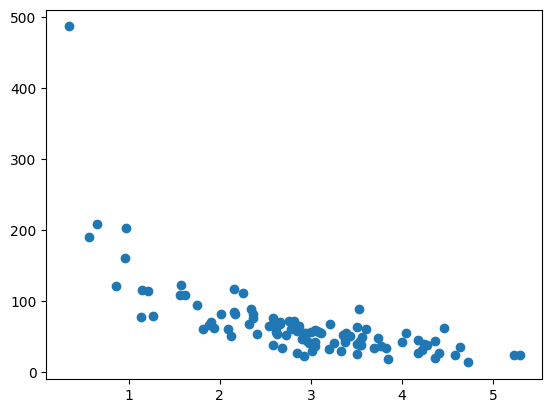

In [37]:
np.random.seed(2) # when you make datasets with random sometimes you want to 
                  # keep track of it for other experiments

    
tx = np.random.normal(3, 1, 100)         # always look up commands to make sure you understand them
                                         # tx represents the number of min before making a purchase
ty = np.random.normal(150, 40, 100)/ tx  # ty represents the amount spent on said purchase

plt.scatter(tx, ty)
plt.show()





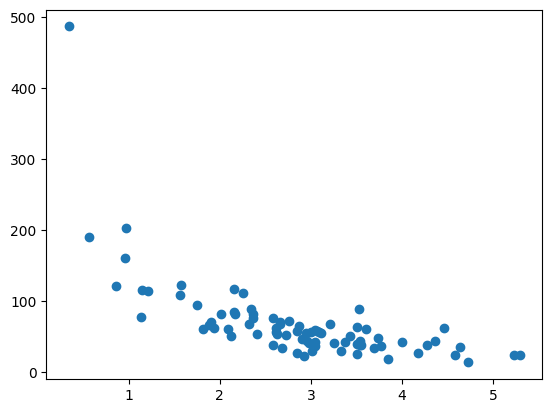

In [38]:
# Split our set
# So 1 way (the way i did in my ML class is using test_train_split command)
# There are simpler ways
# Slicing for example


train_tx = tx[:80]
train_ty = ty[:80]
test_tx = tx[80:]
test_ty = ty[80:]

plt.scatter(train_tx, train_ty)
plt.show()

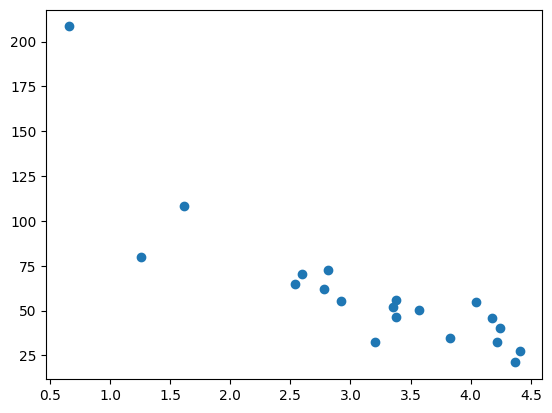

In [39]:
plt.scatter(test_tx, test_ty)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

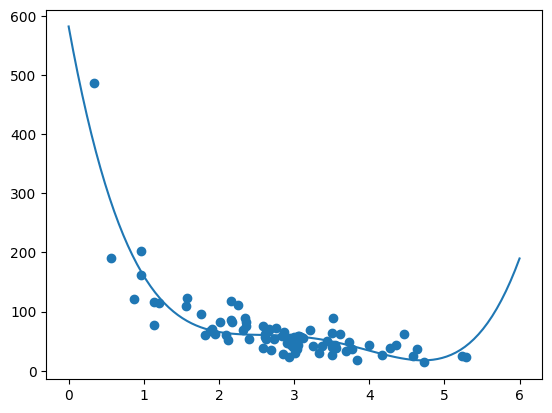

In [40]:
mypurmod = np.poly1d(np.polyfit(train_tx, train_ty, 4))

mypurmodline = np.linspace(0, 6, 100)

plt.scatter(train_tx, train_ty)
plt.plot(mypurmodline, mypurmod(mypurmodline))
plt.show

In [41]:
from sklearn.metrics import r2_score


In [42]:
r2 = r2_score(train_ty, mypurmod(train_tx))
print(r2)                                  # i would only score this as an ok model 

0.7988645544629797


In [43]:
r3 = r2_score(test_ty, mypurmod(test_tx))
print(r3)                                  #fits the model wll enough to predict outside values.

0.8086921460343581


In [44]:
print(mypurmod(5))

22.87962591811811


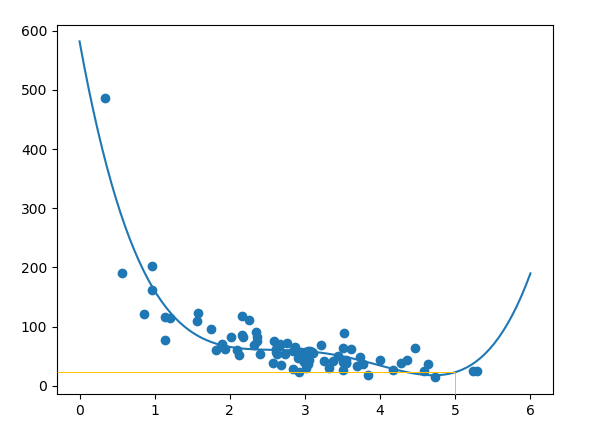

HW1 First HW problem should be how dp you put those lines on this graph

In [45]:
# That might be a question for your HW for today. 
# among others. 

# DecisionTrees !
# hierarchical clustering
# Grid Search
# Catergorical Data
# K-mean
# Bootstrap aggregation
# Cross Validation  *** !
# K- Nearest Nieghbor
# Nueral Networks
# Data Cleanup and Querying *** // Feature Engineering 
                                    # creating additional properties for dataframe for the machine 
                                    # to learn from
# Supervised vs. Unsupervised Learning 

# Deep learning nueral network example
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

##  neeed to redo decision trees and cross validation





In [46]:
# Decision Trees

# A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

# In the example, a person will try to decide if he/she should go to a comedy show or not.

# Luckily our example person has registered every time there was a comedy show in town, 
# and registered some information about the comedian, and also registered if he/she went or not.



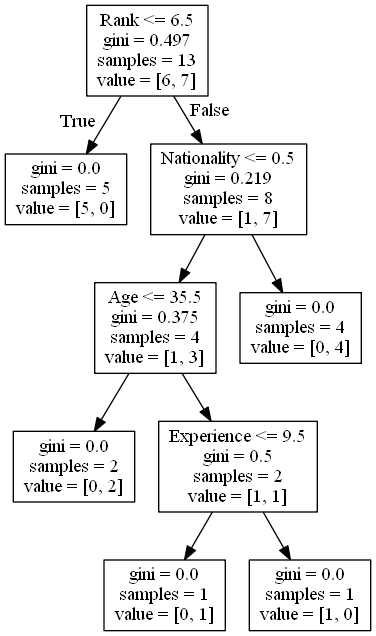

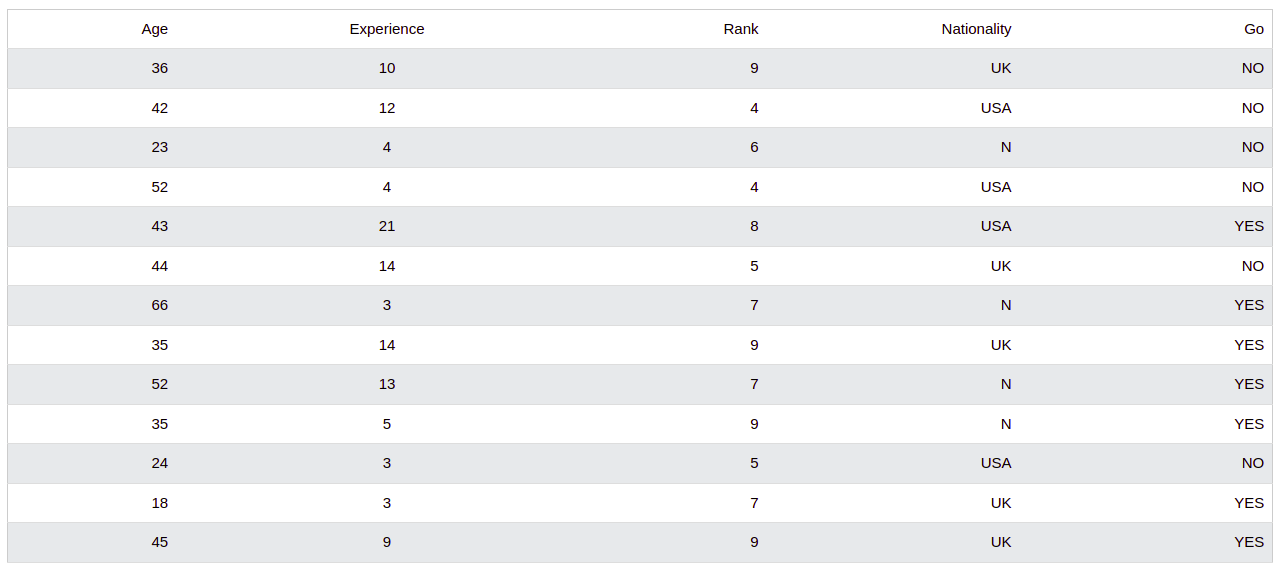

In [47]:
# we also had to make this data set into a CSV which wasn't fun and is would be impossible usually for larger data sets
# I named this shows

In [48]:
df3 = pd.read_csv("SHOWS.csv")

print(df3)

FileNotFoundError: [Errno 2] No such file or directory: 'SHOWS.csv'

In [ ]:
# To make a decision tree, all data has to be numerical.

# We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

# Pandas has a map() method that takes a dictionary with information on how to convert the values.




In [ ]:
d = {"UK": 0, "USA": 1, "N": 2}

df3["Nationality"] = df3["Nationality"].map(d)



In [ ]:
d2 = {"YES": 1, "NO": 0}
df3["Go"] = df3["Go"].map(d2)

In [ ]:
df3  # So this was kind of annoying it wouldnt let me do two maps in the same cell when i was going back through it 
     # but originally it would let me but its fine you can still map the values that you need to map so that everything is numerical 

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [ ]:
features = ['Age', 'Experience', 'Rank', 'Nationality'] # this is what they are usually called in machine learing 

F = df3[features]
a = df3['Go']

print(F)
print(a) # notice how printing A doesnt have the column title that could present problems for larger sets. 

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


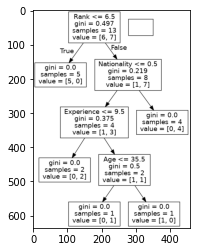

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(F, a) # this works the same as all the other methods
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

Larger version of this was given above


Decision trees use your earlier decisions to determine the probablity of you wanting to go to a show or not


Different Results

You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.

Moving on to cross validation

Cross Validation


When adjusting models we are aiming to increase overall model performance on unseen data. Hyperparameter tuning can lead to much better performance on test sets. However, optimizing parameters to the test set can lead information leakage causing the model to preform worse on unseen data. To correct for this we can perform cross validation.

To better understand CV, we will be performing different methods on the iris dataset. Let us first load in and separate the data.


K-Fold
The training data used in the model is split, into k number of smaller sets, to be used to validate the model. The model is then trained on k-1 folds of training set. The remaining fold is then used as a validation set to evaluate the model.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


In [ ]:
X5, y5 = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X5, y5, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
# I tend to look at the average score

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


I wanted to show you 1 more method so I showed you shufflesplit



Unlike KFold, ShuffleSplit leaves out a percentage of the data, not to be used in the train or validation sets. To do so we must decide what the train and test sizes are, as well as the number of splits.



In [ ]:
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X5, y5, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.91111111 1.         0.91111111 0.93333333 0.91111111]
Average CV Score:  0.9333333333333333
Number of CV Scores used in Average:  5
